In [1]:
# crop image
# create function that can be called to return the cropped image from the obj detection api and send it to the classification model predict function.
# add docstrings, see taxifare docstrings
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests


In [2]:
url = "https://personalexcellence.co/files/apple-table.jpg"
response = requests.get(url, stream=True)

In [3]:
img = Image.open(response.raw)

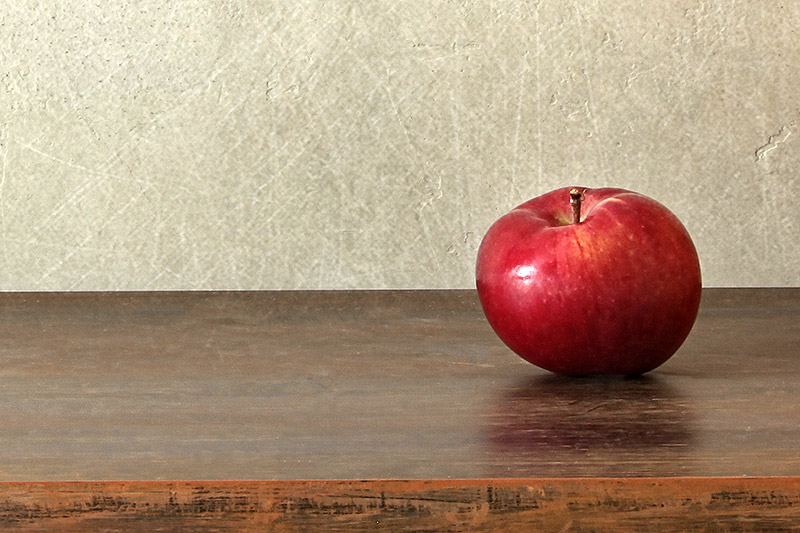

In [4]:
img


In [5]:
# use obj detection api response to get coordinates for bounding box
# use the coordinates to crop the image
# send file as an image
from carb_calc.interface.google_vision import localize_objects_uri

In [6]:
path = "https://personalexcellence.co/files/apple-table.jpg"
api_response = localize_objects_uri(path)

In [7]:
from carb_calc.interface.google_vision import localize_objects_uri

# get the image
path = "https://personalexcellence.co/files/apple-table.jpg"
api_response = localize_objects_uri(path)

# url = "https://personalexcellence.co/files/apple-table.jpg"
# response = requests.get(url, stream=True)
# img = Image.open(response.raw)

# get the dimensions
img_array = np.asarray(img)
x_shape = img_array.shape[1]
y_shape = img_array.shape[0]

# get the bounding box
bbox = api_response['objects'][0]['vertices']


# get the bounding box array elements
for coord in bbox:
    coord['x'] = int(round(coord['x'] * x_shape, 0))
    coord['y'] = int(round(coord['y'] * y_shape, 0))

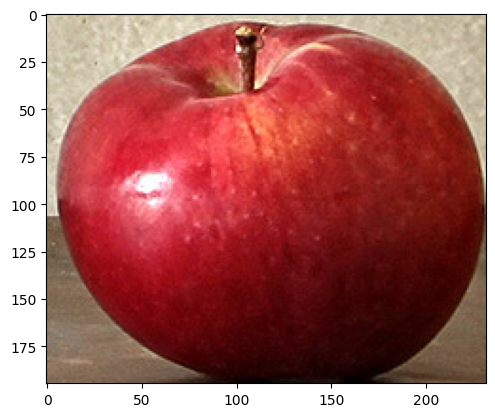

In [8]:
# slice out the object image
obj_array = img_array[bbox[0]['y']:bbox[2]['y'], bbox[0]['x']:bbox[1]['x']]

plt.imshow(obj_array)